# Logistic Regression

Import basic libraries

In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')

Create dataset

In [2]:
X, y = make_classification(
  n_samples=100,
  n_features=2,
  n_redundant=0,
  n_informative=1,
  n_classes=2,
  random_state=41,
  n_clusters_per_class=1,
  hypercube=False,
  class_sep=20,
)

Plot dataset

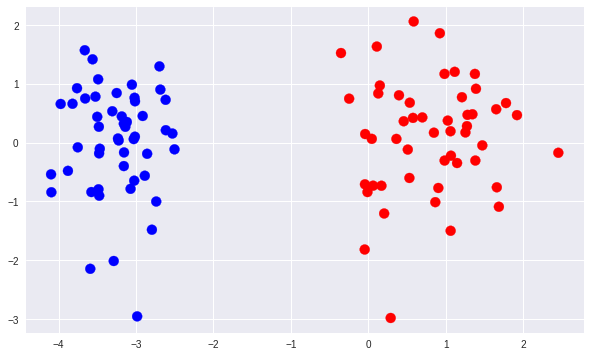

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='bwr')

SKlearn Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
  penalty='none',
  solver='sag'
)

lr.fit(X, y)

/home/smit/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [5]:
print(lr.coef_)
print(lr.intercept_)

[[4.81412934 0.1999837 ]]
[5.80186748]


In [6]:
m1 = -lr.coef_[0][0] / lr.coef_[0][1]
b1 = -lr.intercept_[0] / lr.coef_[0][1]

In [7]:
x_input = np.linspace(-3, 3, 100)
y_input = m1 * x_input + b1

Logistic Regression from scratch

In [8]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [9]:
def gd(X, y, epochs=10000, learning_rate=0.1):
  X = np.c_[np.ones(X.shape[0]), X]
  w = np.zeros(X.shape[1])
  for i in range(epochs):
    y_pred = sigmoid(X @ w)
    gradient = ((y - y_pred) @ X) / X.shape[0]
    w += learning_rate * gradient
  return w[1:], w[0]

In [10]:
coef_, intercept_ = gd(X, y)

In [11]:
m = -coef_[0] / coef_[1]
b = -intercept_ / coef_[1]

In [12]:
x_input1 = np.linspace(-3, 3, 100)
y_input1 = m * x_input1 + b

Logistic Regression Comparision plot: SKlearn vs Custom

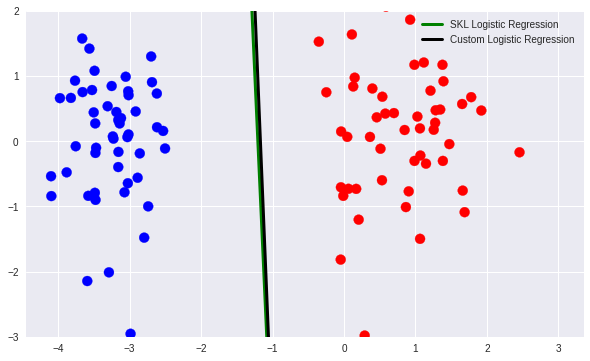

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, 'green', linewidth=3, label='SKL Logistic Regression')
plt.plot(x_input1, y_input1, 'black', linewidth=3, label='Custom Logistic Regression')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='bwr')
plt.ylim(-3, 2)
plt.legend()
plt.show()